In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import numpy as np
import warnings
warnings.filterwarnings("ignore")
# 1. Load Dataset
df = pd.read_csv("Zoo.csv")
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [2]:
# Drop 'animal name' (not useful for prediction)
df = df.drop("animal name", axis=1)
df

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


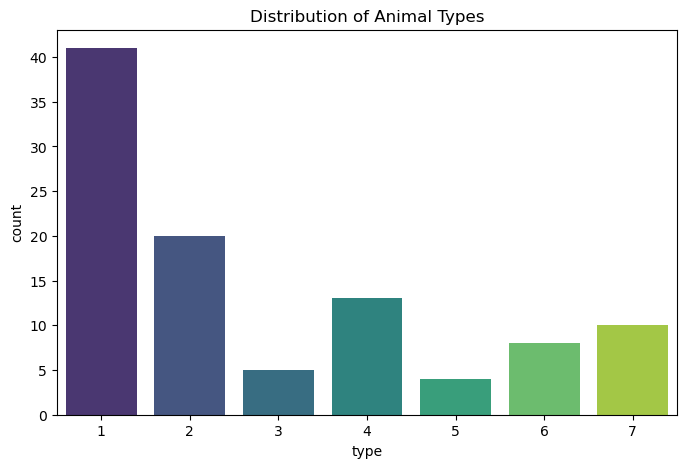

In [3]:
##2.Data Visualization
plt.figure(figsize=(8,5))
sns.countplot(x="type", data=df, palette="viridis")
plt.title("Distribution of Animal Types")
plt.show()

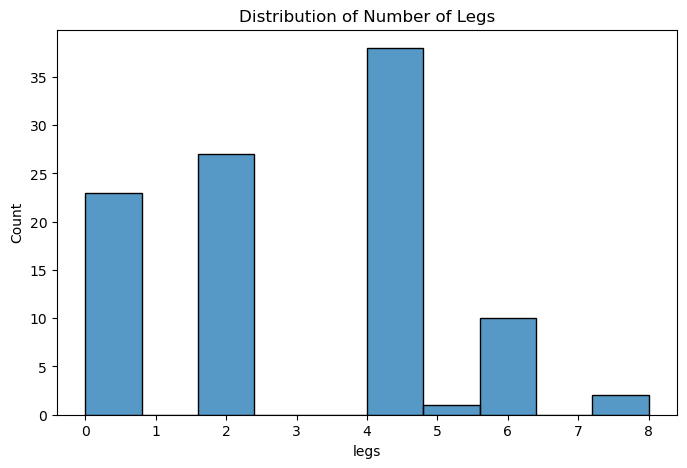

In [4]:
plt.figure(figsize=(8,5))
sns.histplot(df["legs"], bins=10, kde=False)
plt.title("Distribution of Number of Legs")
plt.show()

In [5]:
# 3. Preprocess Data
X = df.drop("type", axis=1)
y = df["type"]

In [6]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [8]:
# 4. Implement KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:
# Predictions
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 4, 6, 6, 2, 7, 1, 1, 2, 4, 1, 4],
      dtype=int64)

In [10]:
# 5. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9523809523809523
Precision: 0.9206349206349207
Recall: 0.9523809523809523
F1 Score: 0.9333333333333333

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         1
           4       0.67      1.00      0.80         2
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         1

    accuracy                           0.95        21
   macro avg       0.78      0.83      0.80        21
weighted avg       0.92      0.95      0.93        21



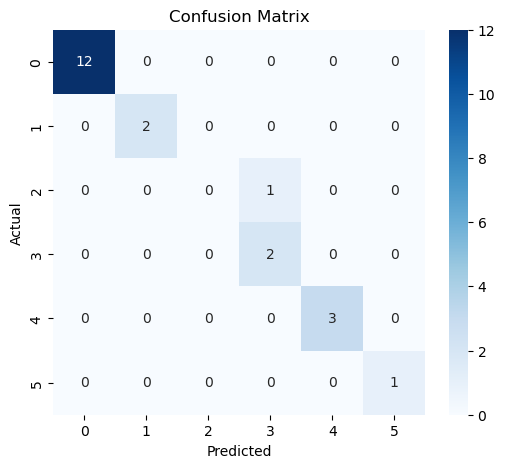

In [11]:
# Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# 6. Choosing best K value
error_rate = []
for k in range(1, 21):
    knn_temp = KNeighborsClassifier(n_neighbors=k)
    knn_temp.fit(X_train, y_train)
    pred_k = knn_temp.predict(X_test)
    error_rate.append(np.mean(pred_k != y_test))

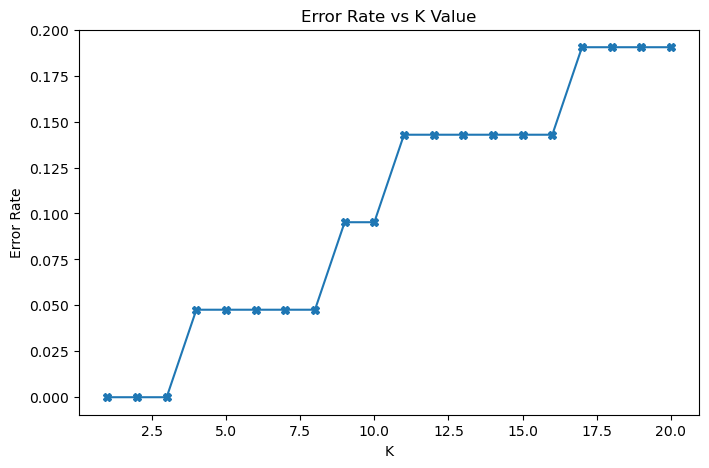

In [13]:
plt.figure(figsize=(8,5))
plt.plot(range(1,21), error_rate, marker='X', linestyle='-')
plt.title("Error Rate vs K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

In [14]:
# 7. Decision Boundary Visualization (using PCA for 2D projection)
from sklearn.decomposition import PCA
# Reduce to 2D for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)
knn_vis = KNeighborsClassifier(n_neighbors=5)
knn_vis.fit(X_train_pca, y_train_pca)

KNeighborsClassifier()

In [15]:
# Meshgrid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

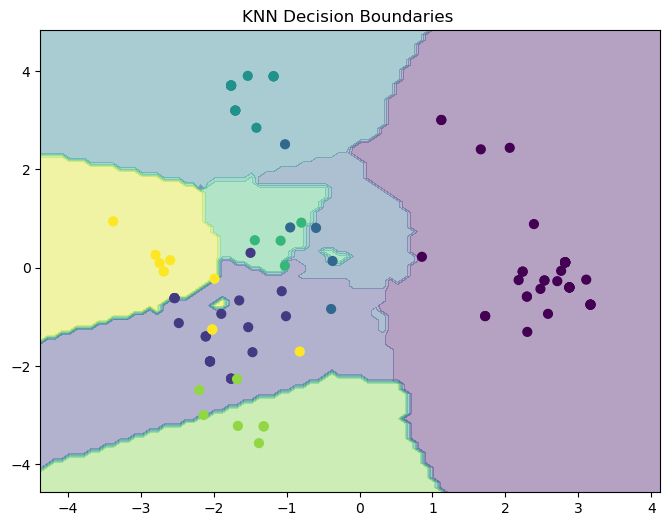

In [16]:
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=40)
plt.title("KNN Decision Boundaries ")
plt.show()

In [17]:
#Conclusion
#The K-Nearest Neighbours algorithm successfully classified animals based on their characteristics with good accuracy.
#Choosing the right value of K and appropriate distance metric is crucial for performance. 
#KNN is simple, intuitive, and effective for small to medium datasets, but can be computationally expensive for large datasets.
#Dimensionality reduction (like PCA) helps in visualization and efficiency.

In [18]:
#Interview Questions:
#1. What are the key hyperparameters in KNN?
#ANS:
#In KNN, the key hyperparameters are K, distance metric, weights, and search algorithm.
#K(n_neighbors): Number of neighbors.
#Metric: Distance measure 
#Weights: Uniform or distance-based influence of neighbors.
#Algorithm: Search method 
#These control how neighbors are chosen, how similarity is measured, and how predictions are made.

In [19]:
##2. What distance metrics can be used in KNN?
#ANS:
#KNN can use Euclidean, Manhattan, Minkowski, Hamming, and Cosine distances depending on the data type.
#Euclidean:default for continuous data.
#Manhattan:sum of absolute differences.
#Minkowski:generalized distance 
#Hamming :for categorical/binary data.
#Cosine :for text/high-dimensional vectors.